In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path

In [2]:
df = pd.read_csv('insurance.csv')

In [3]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
df.describe(include='all')

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338,1338.000000,1338.000000,1338,1338,1338.000000
unique,NaN,2,NaN,NaN,2,4,NaN
top,NaN,male,NaN,NaN,no,southeast,NaN
freq,NaN,676,NaN,NaN,1064,364,NaN
mean,39.207025,NaN,30.663397,1.094918,NaN,NaN,13270.422265
std,14.049960,NaN,6.098187,1.205493,NaN,NaN,12110.011237
min,18.000000,NaN,15.960000,0.000000,NaN,NaN,1121.873900
25%,27.000000,NaN,26.296250,0.000000,NaN,NaN,4740.287150
50%,39.000000,NaN,30.400000,1.000000,NaN,NaN,9382.033000
75%,51.000000,NaN,34.693750,2.000000,NaN,NaN,16639.912515


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [6]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

All data seems to be cleaned so let's do EDA

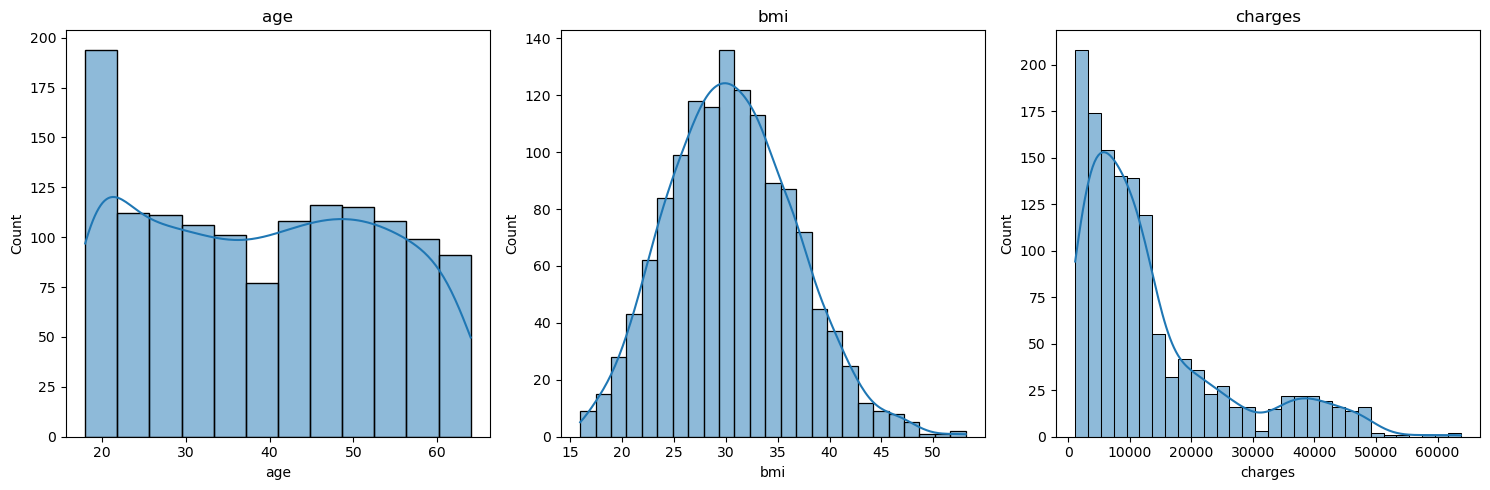

In [60]:
cols_to_plot = [c for c in df.select_dtypes('number') if c != 'children']

fig, axes = plt.subplots(1, 3, figsize=(15,5))

for column, ax in zip(cols_to_plot, axes):
    sns.histplot(data=df, x=column, ax=ax, kde=True)
    ax.set_title(column)
    
plt.tight_layout()
plt.show()

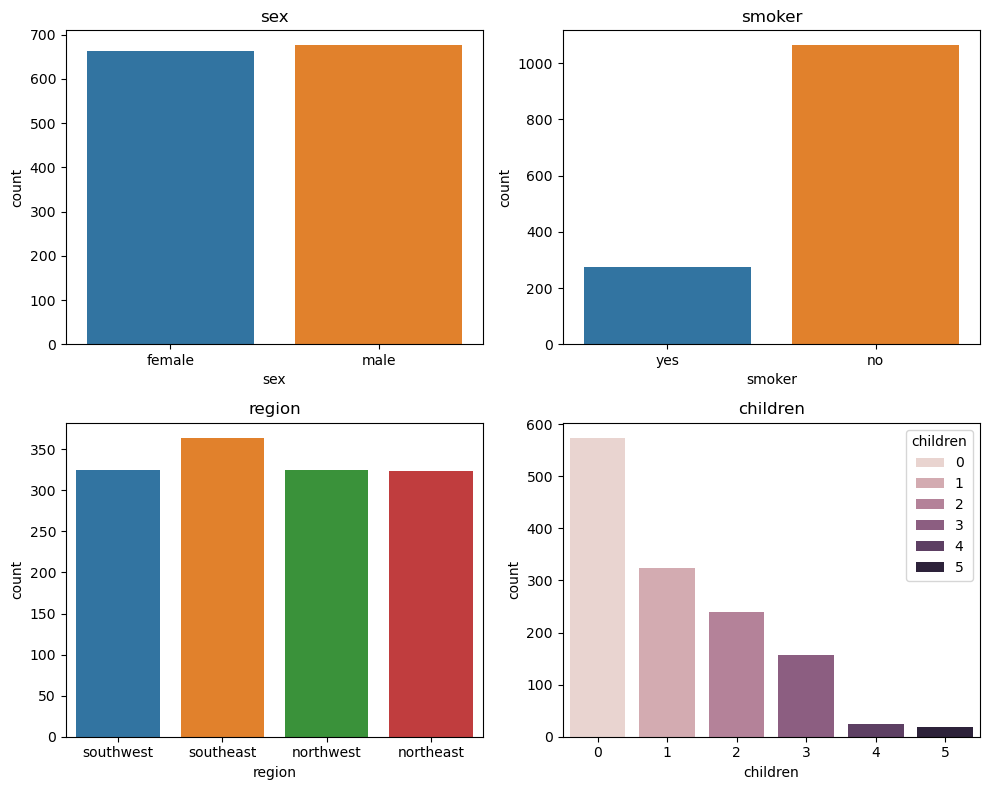

In [61]:
fig, axes = plt.subplots(2,2, figsize=(10, 8))

for column, ax in zip(df.select_dtypes('object').columns.to_list() + ['children'], axes.flatten()):
    sns.countplot(df, x=column, ax=ax, hue=column)
    ax.set_title(column)
    
plt.tight_layout()
plt.show()

In [93]:
df_dumped = pd.get_dummies(df, columns=['region'])
df_dumped['smoker'] = df_dumped['smoker'].replace({'yes': 1, 'no': 0})
df_dumped['sex'] = df_dumped['sex'].replace({'female': 0, 'male': 1})

C:\Users\mwisn\AppData\Local\Temp\ipykernel_33640\1897126597.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dumped['smoker'] = df_dumped['smoker'].replace({'yes': 1, 'no': 0})
C:\Users\mwisn\AppData\Local\Temp\ipykernel_33640\1897126597.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df_dumped['sex'] = df_dumped['sex'].replace({'female': 0, 'male': 1})


<Axes: >

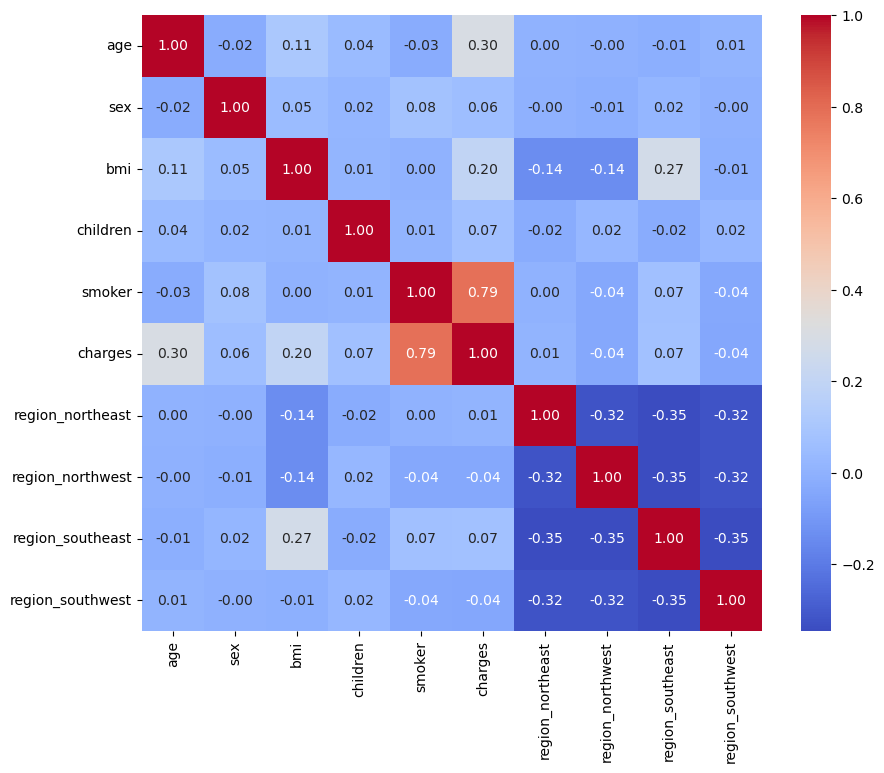

In [95]:
plt.figure(figsize=(10,8))
sns.heatmap(df_dumped.corr(), annot=True, cmap='coolwarm', fmt='.2f')

Smoking has strong impact on charges, let's show it using boxplot

<Axes: xlabel='smoker', ylabel='charges'>

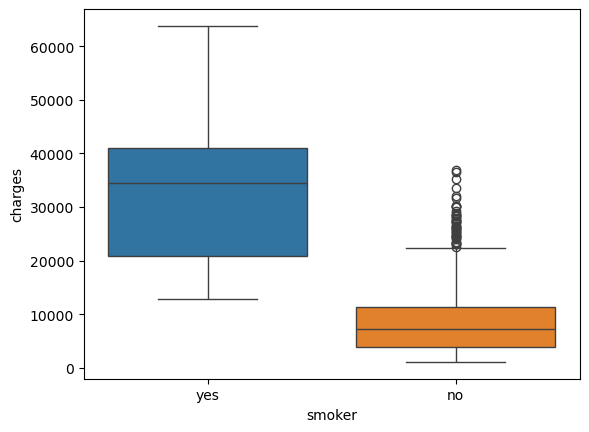

In [90]:
sns.boxplot(df, x='smoker', y='charges', hue='smoker')

As we can see, no smokers pay much less for charges. The distribution of observation is smaller too then people who smoke. 
Let's see other category columns

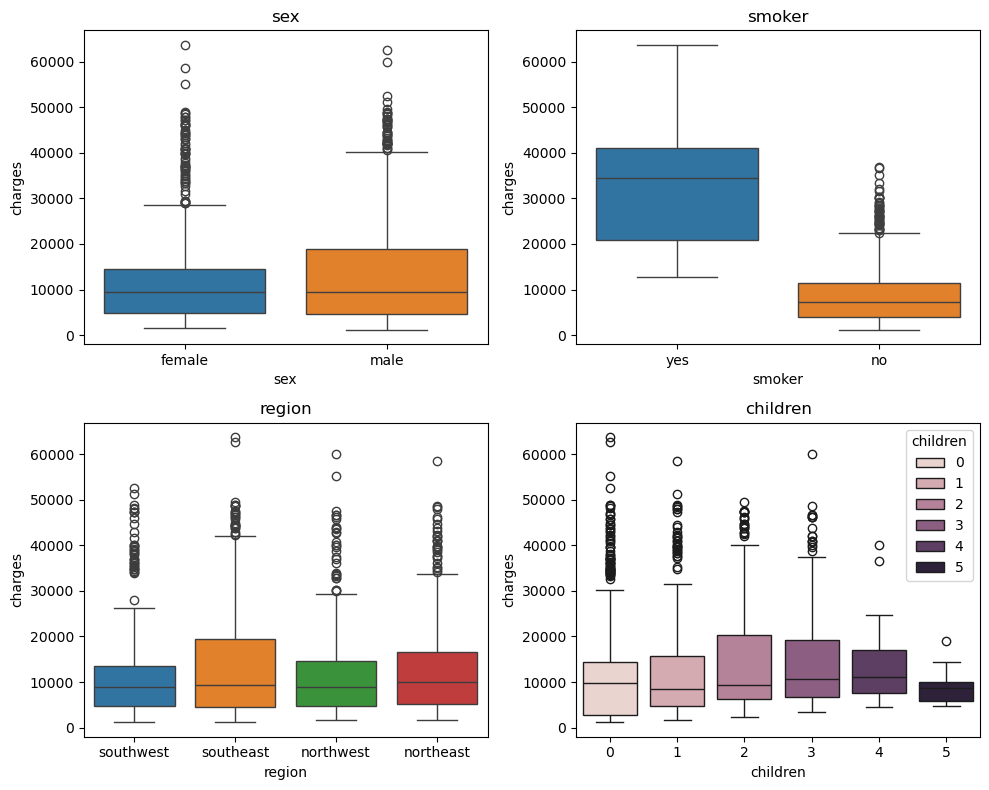

In [96]:
fig, axes = plt.subplots(2,2, figsize=(10, 8))

for column, ax in zip(df.select_dtypes('object').columns.to_list() + ['children'], axes.flatten()):
    sns.boxplot(df, x=column, y='charges', ax=ax, hue=column)
    ax.set_title(column)
    
plt.tight_layout()
plt.show()

Median and IQR is really equal in every plots expect smoker plot. Vary distribution in children plot we can describe as diffrenet value count, what we could say earlier

Now let's see how age and bmi looks in correlation with charges on a plot

Text(0.5, 1.0, 'bmi')

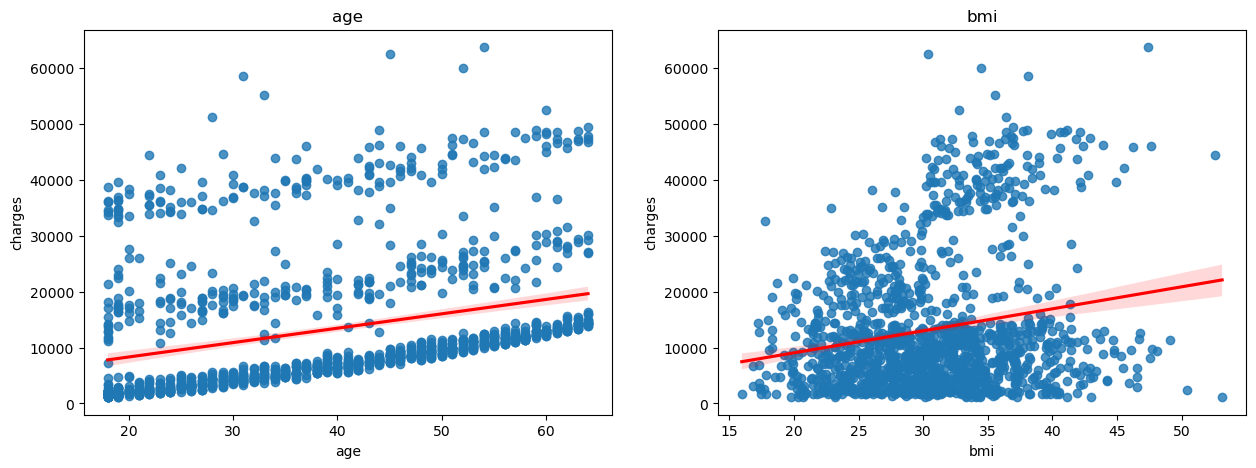

In [104]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))
sns.regplot(df, x='age', y='charges', ax=axes[0], line_kws={'color':'red'})
axes[0].set_title('age')
sns.regplot(df, x='bmi', y='charges', ax=axes[1], line_kws={'color':'red'})
axes[1].set_title('bmi')

Looking at age plot we can see a little correlation. Heatmap showed us r=0.3 between age and charges. We should assume that older people need more medical help than youngers.  

BMI plot shows us maybe not so much linear correlation but something intresting else. We've got a lot observations in bmi equals more or less 30 (that was seen at histplot), so of course we can expect that in this close range we have got diffrent charge values. There were not much people with very big bmi, but when these people are, they have really high charges cost (or maybe they don't go to a medical centre). I think we can assume that higher bmi costs more money for treatment

Let's see cost of charges for diffrent number of children broken down by sex

Text(0.5, 1.0, 'Distribution of charges by number of children and sex')

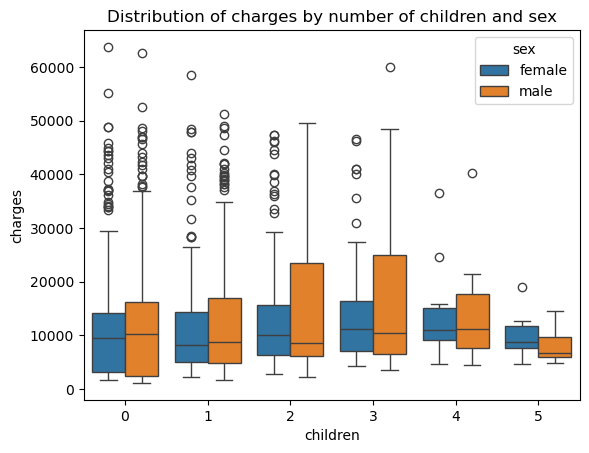

In [121]:
sns.boxplot(df, x='children', y='charges', hue='sex')
plt.title('Distribution of charges by number of children and sex')

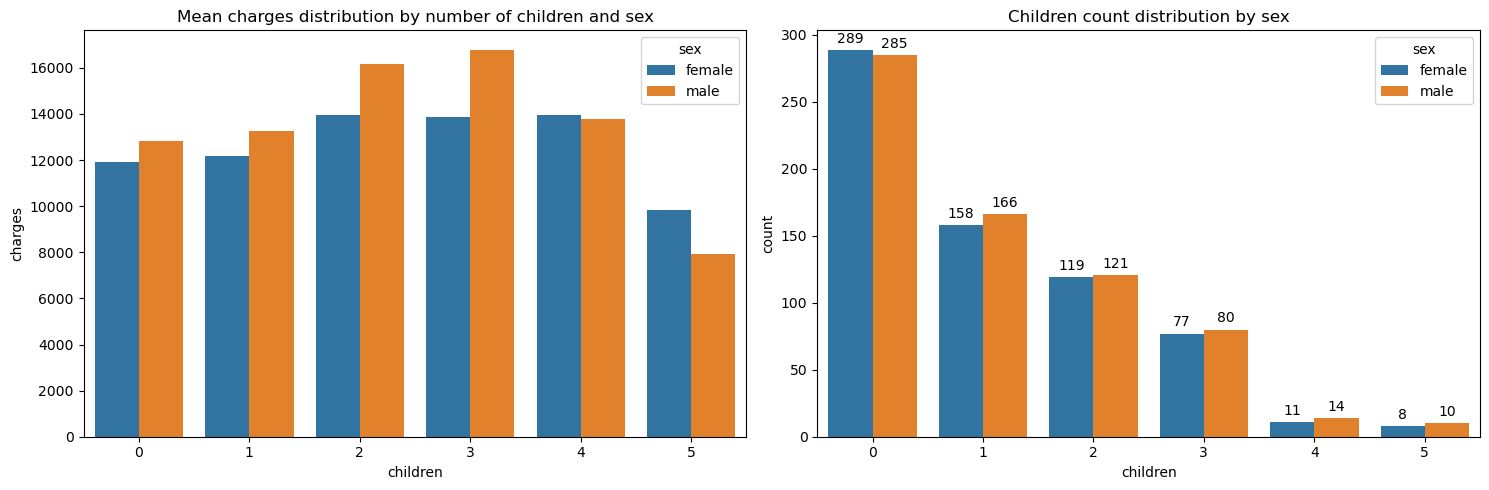

In [123]:
fig, axes = plt.subplots(1, 2, figsize=(15,5))

df_grouped = df.groupby(['children', 'sex'], as_index=False)['charges'].agg('mean')
sns.barplot(df_grouped, x='children', y='charges', hue='sex', ax=axes[0])
axes[0].set_title('Mean charges distribution by number of children and sex')


sns.countplot(df, x='children', hue='sex', ax=axes[1])
axes[1].set_title('Children count distribution by sex')

for container in axes[1].containers:
    axes[1].bar_label(container, padding=3)

plt.tight_layout()
plt.show()

So charges median are still equal even for diffrenet sex, but the distributions are not. Men pay average higher than women. There are just few observation when they've got 4 or 5 children, so we cannot say it is regular or not (this could be a selection error).